# Web Site Classification
## Author: Eren ERİŞ
Dataset: https://www.kaggle.com/datasets/hetulmehta/website-classification

Desription : 

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("/kaggle/input/website-classification/website_classification.csv")

In [3]:
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [5]:
df.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

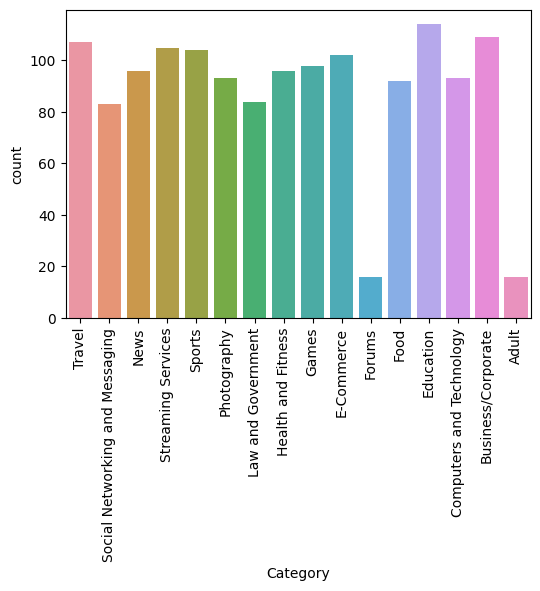

In [7]:
plt.figure(figsize = (6,4))

sns.countplot(data = df, x = 'Category')
# X ekseni etiketini 90 derece döndür
plt.xticks(rotation=90)
plt.show()

In [9]:
df['cleaned_website_text']=df['cleaned_website_text'].str.lower()
df['cleaned_website_text']=df['cleaned_website_text'].str.replace('[^\w\s]','') # noktalama isaretlerini kaldir
df['cleaned_website_text']=df['cleaned_website_text'].str.replace('\d+','') #rakamlari kaldir
df['cleaned_website_text']=df['cleaned_website_text'].str.replace('\r','').replace('\n','')

In [10]:
X = df['cleaned_website_text']
y = df['Category']

In [11]:
#Katergori Değişkenlerini Etiketleme
le = LabelEncoder()
le.fit(y)
le.classes_

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)

In [12]:
y = le.transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Create classifier pipeline¶


In [16]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [17]:
predictions = text_clf.predict(X_test)

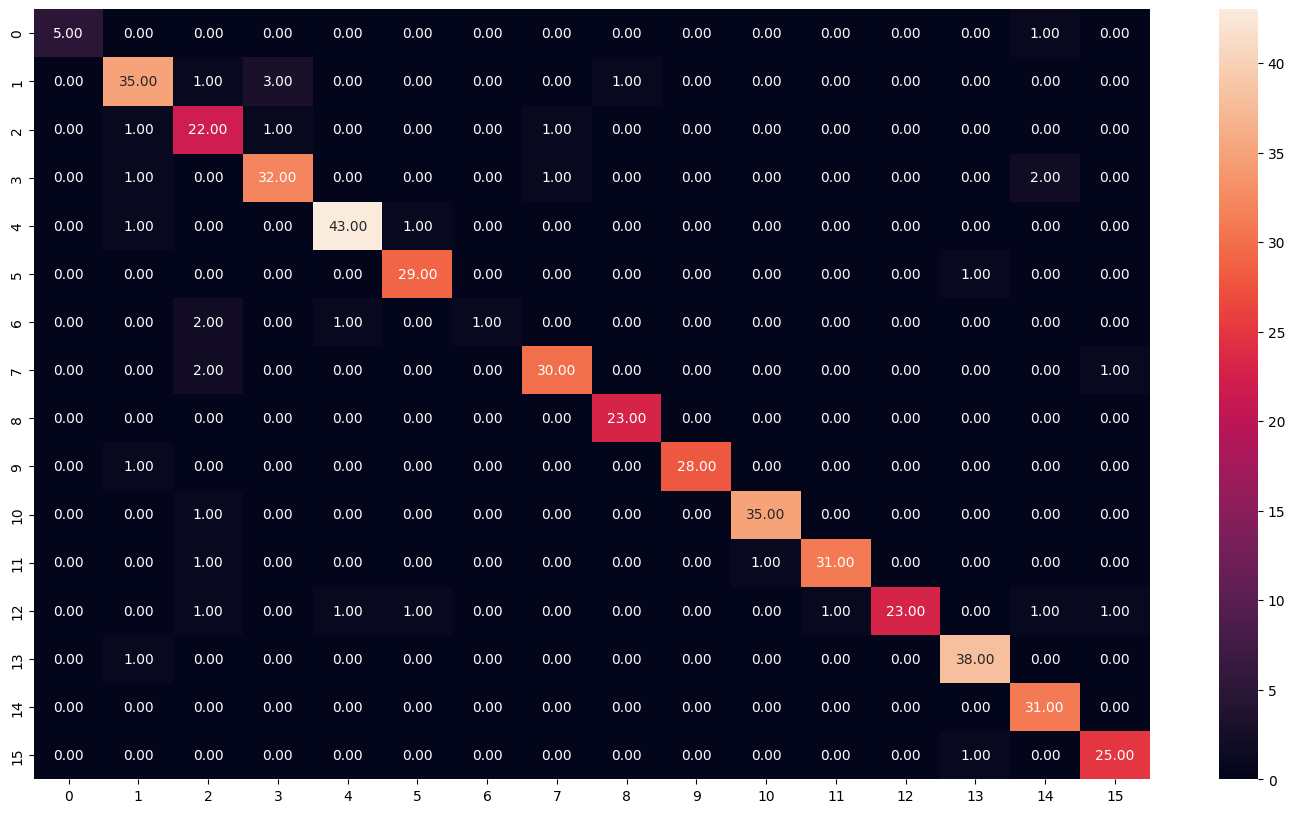

In [19]:
plt.figure(figsize = (18,10))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='.2f')
plt.show()

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.88      0.88        40
           2       0.73      0.88      0.80        25
           3       0.89      0.89      0.89        36
           4       0.96      0.96      0.96        45
           5       0.94      0.97      0.95        30
           6       1.00      0.25      0.40         4
           7       0.94      0.91      0.92        33
           8       0.96      1.00      0.98        23
           9       1.00      0.97      0.98        29
          10       0.97      0.97      0.97        36
          11       0.97      0.94      0.95        33
          12       1.00      0.79      0.88        29
          13       0.95      0.97      0.96        39
          14       0.89      1.00      0.94        31
          15       0.93      0.96      0.94        26

    accuracy                           0.93       465
   macro avg       0.94   

In [21]:
print(accuracy_score(y_test, predictions).round(2))

0.93
